In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"]=(12,8)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train=pd.read_csv('../dataset/train.csv',index_col='campaign_id')
test=pd.read_csv('../dataset/test.csv',index_col='campaign_id')

In [ ]:
train.head()

,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
campaign_id,,,,,,,,,,,,,,,,,,,,,
1,3,76,10439,39,5,1,Noon,6,26,3,...,0,0,0,0,0,0,0,0,14,0.103079
2,3,54,2570,256,5,1,Morning,2,11,0,...,0,0,0,0,0,0,0,0,10,0.700000
3,3,59,12801,16,5,1,Noon,2,11,3,...,1,0,1,0,0,0,0,0,16,0.002769
4,3,74,11037,30,4,0,Evening,15,9,4,...,0,0,0,0,0,0,0,0,10,0.010868
5,3,80,10011,27,5,1,Noon,6,26,3,...,0,0,1,0,0,0,0,0,14,0.142826


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1888 entries, 1 to 1888
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sender              1888 non-null   int64  
 1   subject_len         1888 non-null   int64  
 2   body_len            1888 non-null   int64  
 3   mean_paragraph_len  1888 non-null   int64  
 4   day_of_week         1888 non-null   int64  
 5   is_weekend          1888 non-null   int64  
 6   times_of_day        1888 non-null   object 
 7   category            1888 non-null   int64  
 8   product             1888 non-null   int64  
 9   no_of_CTA           1888 non-null   int64  
 10  mean_CTA_len        1888 non-null   int64  
 11  is_image            1888 non-null   int64  
 12  is_personalised     1888 non-null   int64  
 13  is_quote            1888 non-null   int64  
 14  is_timer            1888 non-null   int64  
 15  is_emoticons        1888 non-null   int64  
 16  is_discount

In [ ]:
train.isnull().sum()

sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

<Axes: xlabel='click_rate', ylabel='Count'>

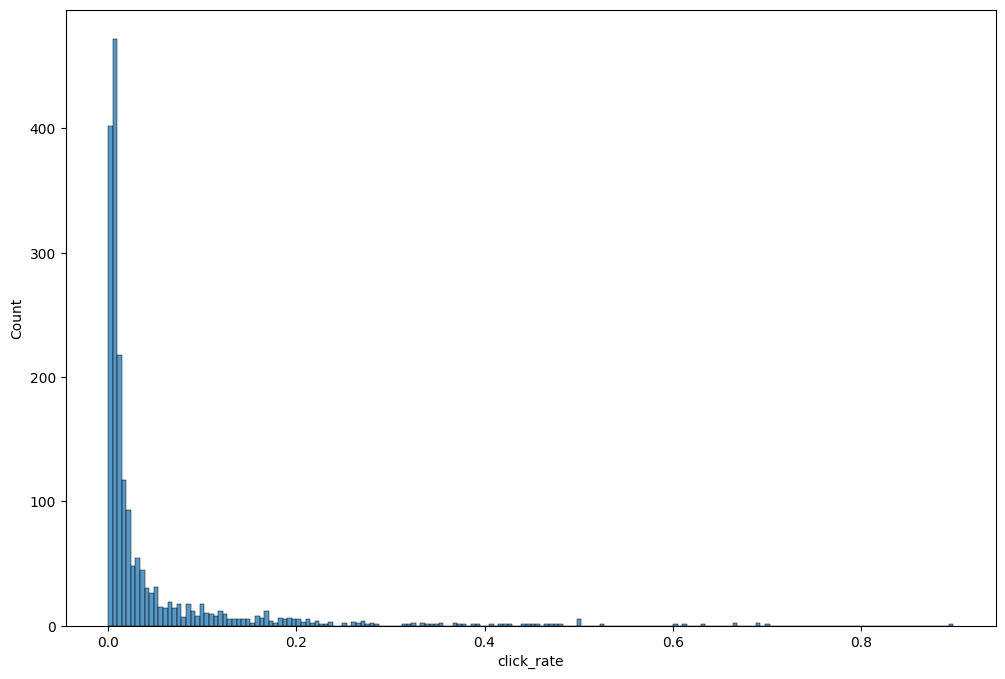

In [ ]:
sns.histplot(train['click_rate'])

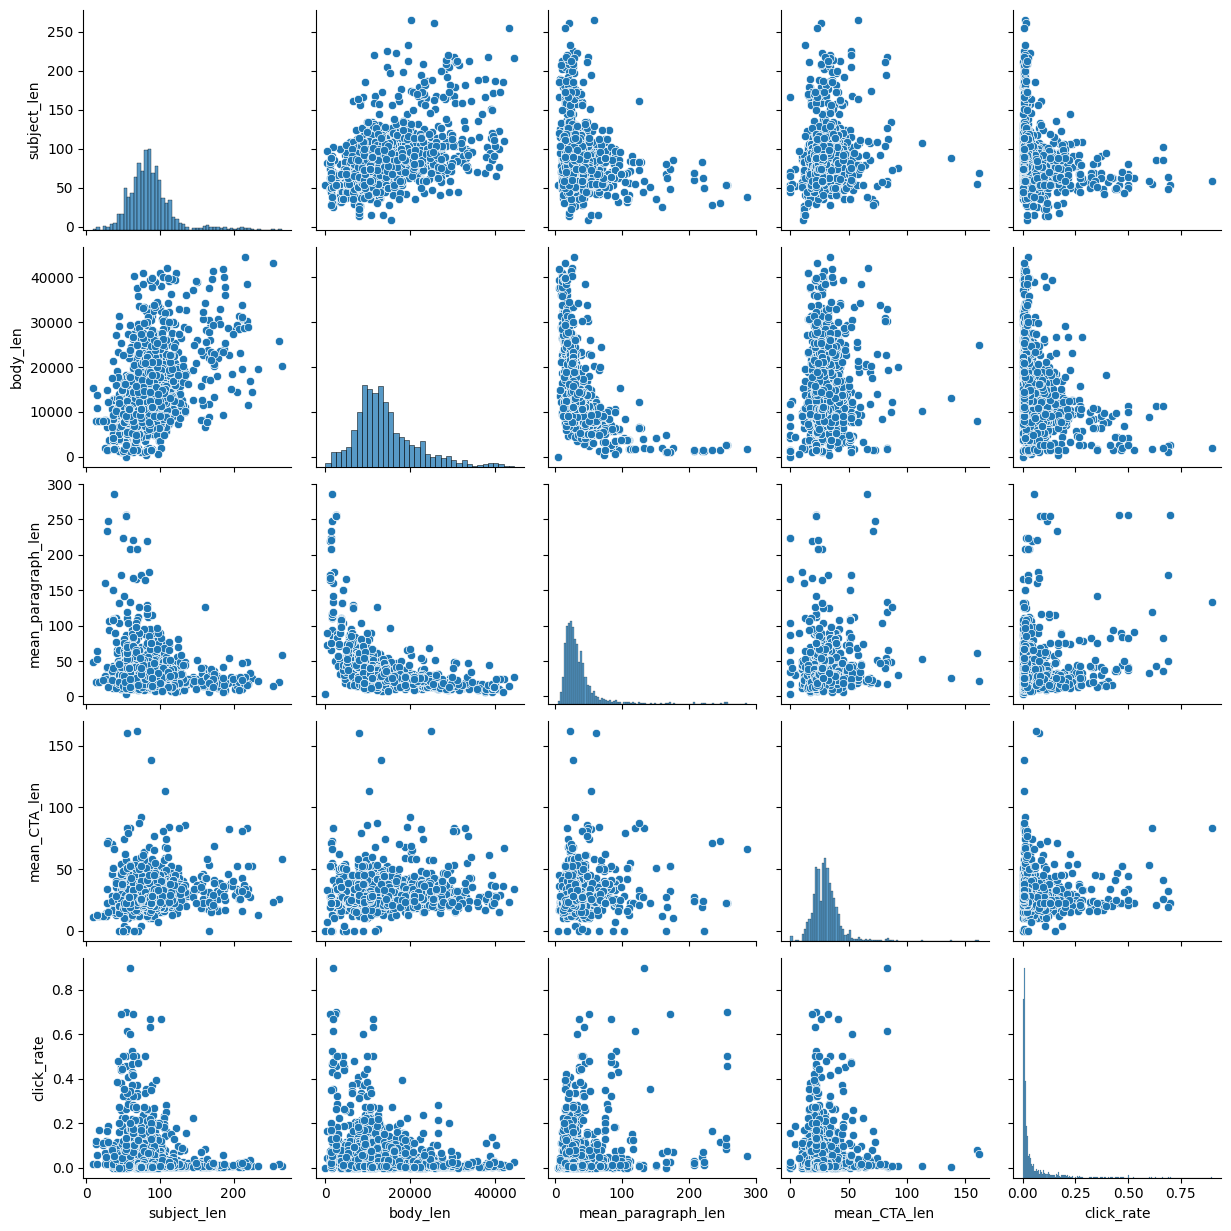

In [ ]:
sns.pairplot(train[['subject_len', 'body_len', 'mean_paragraph_len','mean_CTA_len','click_rate']])

In [ ]:
corr=train[['subject_len', 'body_len', 'mean_paragraph_len','mean_CTA_len','click_rate']].corr()

<Axes: >

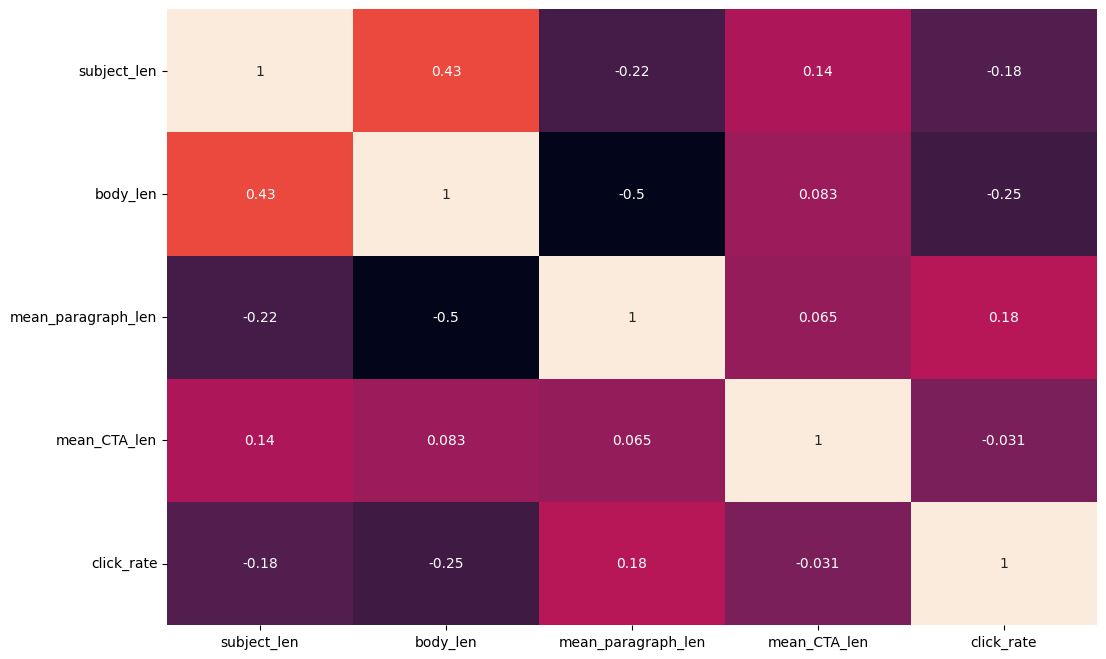

In [ ]:
sns.heatmap(corr,annot=True,cbar=False)

In [ ]:
train.duplicated().any()

False

In [ ]:
train.nunique()

sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [ ]:
train['is_price'].unique()

array([    0,  5499,  8000,  4999,  1399,  5000,  1000, 14999])

In [ ]:
train['is_price']=(train['is_price']!=0).astype('int')
test['is_price']=(test['is_price']!=0).astype('int')

In [ ]:
train=pd.get_dummies(train,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [ ]:
train.columns

Index(['sender', 'subject_len', 'body_len', 'mean_paragraph_len',
       'day_of_week', 'is_weekend', 'category', 'product', 'no_of_CTA',
       'mean_CTA_len', 'is_image', 'is_personalised', 'is_quote', 'is_timer',
       'is_emoticons', 'is_discount', 'is_price', 'is_urgency',
       'target_audience', 'click_rate', 'times_of_day_Morning',
       'times_of_day_Noon'],
      dtype='object')

In [ ]:
numeric = ['subject_len', 'body_len', 'mean_paragraph_len', 'mean_CTA_len']
categorical=['sender','day_of_week', 'is_weekend','times_of_day_Morning','times_of_day_Noon',
             'category','product','no_of_CTA', 'is_image', 'is_personalised', 'is_quote','is_emoticons',
             'is_discount','is_price', 'is_urgency','target_audience', 'day_of_week', 'no_of_CTA']

In [ ]:
X_train=train.drop('click_rate',axis=1)
y_train=train['click_rate']

X_test=test

from sklearn.impute import SimpleImputer

imp_n=SimpleImputer(strategy='mean')
imp_n.fit(X_train[numeric])

train_n=imp_n.transform(X_train[numeric])
test_n=imp_n.transform(X_test[numeric])

imp_c=SimpleImputer(strategy='most_frequent')
imp_c.fit(X_train[categorical])

train_c=imp_c.transform(X_train[categorical])
test_c=imp_c.transform(X_test[categorical])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale=MinMaxScaler()
scale.fit(train_n)

MinMaxScaler()

In [ ]:
train_n=scale.transform(train_n)
test_n=scale.transform(test_n)

In [ ]:
from sklearn.feature_selection import f_classif,f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

<Axes: >

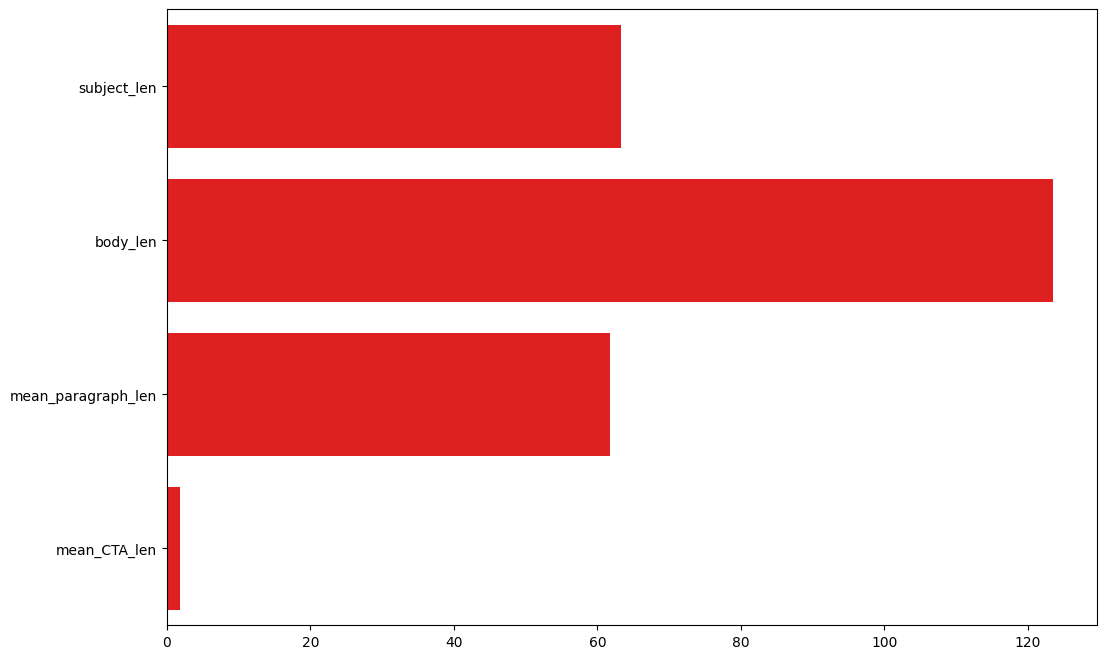

In [ ]:
fsn=SelectKBest(score_func=f_regression,k='all')
fsn.fit(train_n,train['click_rate'])

sns.barplot(x=fsn.scores_,y=numeric,color='red')

<Axes: >

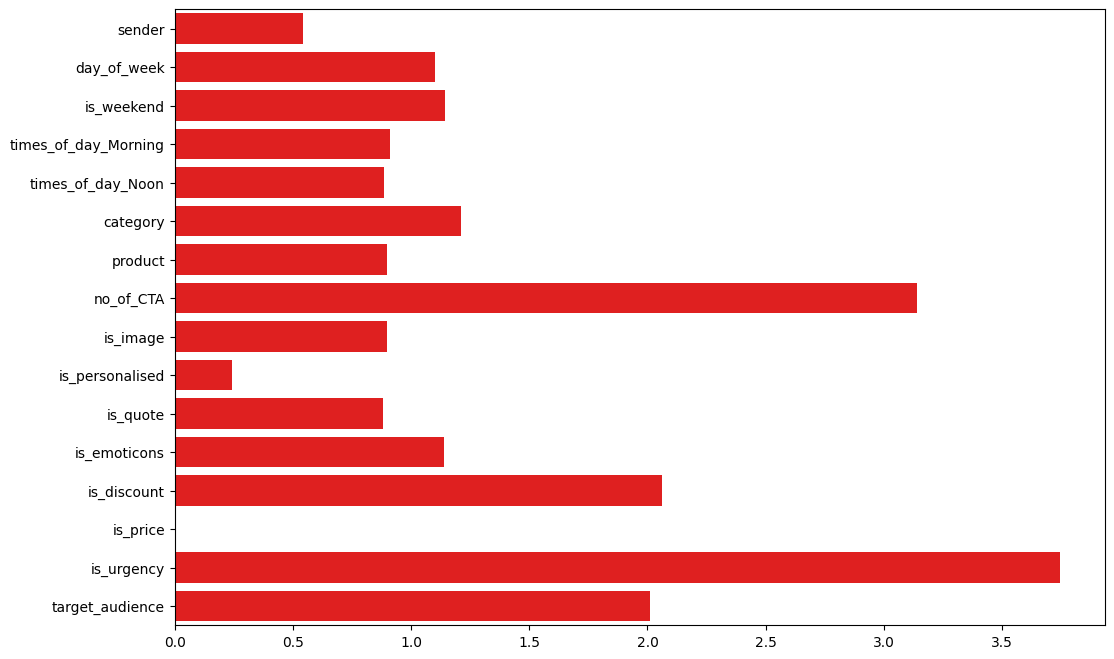

In [ ]:
fsc=SelectKBest(score_func=f_classif,k='all')
fsc.fit(train_c,train['click_rate'])

sns.barplot(x=fsc.scores_,y=categorical,color='red')

In [ ]:
results=[]

for k in range(5,15):
    fsc=SelectKBest(score_func=f_classif,k=k)
    fsc.fit(train[categorical],train['click_rate'])

    train_c=fsc.transform(train[categorical])
    test_c=fsc.transform(test[categorical])

    X_train=np.concatenate((train_c,train_n),axis=1)
    X_test=np.concatenate((test_c,test_n),axis=1)
    y_train=train['click_rate'].values

    model=RandomForestRegressor()
    cv=RepeatedKFold(n_splits=3, n_repeats=10)
    scores=cross_val_score(model,X_train,y_train,cv=cv,scoring='neg_mean_absolute_error')
    results.append(scores.mean())
    print("k = ",k)
    print(scores.mean())

k =  5
-0.03288046233986738
k =  6
-0.032435786606984714
k =  7
-0.03122286150402511
k =  8
-0.03141383324141829
k =  9
-0.0313826766213715
k =  10
-0.031757455008467814
k =  11
-0.031971585572478624
k =  12
-0.031861408429166564
k =  13
-0.03173411254561356
k =  14
-0.03149777673707579


In [ ]:
fsc=SelectKBest(score_func=f_classif,k=9)
fsc.fit(train[categorical],train['click_rate'])

train_c=fsc.transform(train[categorical])
test_c=fsc.transform(test[categorical])

X_train=np.concatenate((train_c,train_n),axis=1)
X_test=np.concatenate((test_c,test_n),axis=1)
y_train=train['click_rate'].values

parameters={'n_estimators':range(50,250,5),
              'max_depth':range(4,14)}

model=RandomForestRegressor()
grid=GridSearchCV(model,parameters,scoring='neg_mean_absolute_error',cv=5)

grid.fit(X_train,y_train)

grid.best_params_

grid.best_score_

model=grid.best_estimator_
model.fit(X_train,y_train)

y_test=model.predict(X_test)



In [ ]:
selected_indices = fsc.get_support(indices=True)
selected_feature_names = np.array(categorical)[selected_indices]
print(f"Best 9 features: {selected_feature_names}")

Best 9 features: ['is_weekend' 'category' 'no_of_CTA' 'is_emoticons' 'is_discount'
 'is_price' 'is_urgency' 'target_audience' 'no_of_CTA']


In [ ]:
best_features = ['is_weekend', 'category', 'no_of_CTA', 'is_emoticons', 'is_discount',
                 'is_price', 'is_urgency', 'target_audience', 'day_of_week', 'no_of_CTA']

In [ ]:
X_train = train[best_features].values
y_train = train['click_rate'].values
X_test = test[best_features].values

In [ ]:
parameters = {'n_estimators': range(50, 250, 5),
              'max_depth': range(4, 14)}

In [ ]:
model = RandomForestRegressor()
grid = GridSearchCV(model, parameters, scoring='neg_mean_absolute_error', cv=5)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(4, 14),
                         'n_estimators': range(50, 250, 5)},
             scoring='neg_mean_absolute_error')

In [ ]:
model = grid.best_estimator_
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=95)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_test, y_val_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_test, y_val_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_test, y_val_pred)

y_train_pred_bin = (y_train_pred >= 0.5).astype(int)
y_val_pred_bin = (y_val_pred >= 0.5).astype(int)

y_val_bin = (y_test >= 0.5).astype(int)

accuracy_val = accuracy_score(y_val_bin, y_val_pred_bin)
precision_val = precision_score(y_val_bin, y_val_pred_bin)
recall_val = recall_score(y_val_bin, y_val_pred_bin)
f1_val = f1_score(y_val_bin, y_val_pred_bin)

classification_report_val = classification_report(y_val_bin, y_val_pred_bin, target_names=['Non-Click', 'Click'])

y_test_simulated = np.random.uniform(low=0, high=1, size=X_test.shape[0])
y_test_bin_simulated = (y_test_simulated >= 0.5).astype(int)

y_test_pred = model.predict(X_test)
y_test_pred_bin = (y_test_pred >= 0.5).astype(int)

accuracy_test = accuracy_score(y_test_bin_simulated, y_test_pred_bin)
precision_test = precision_score(y_test_bin_simulated, y_test_pred_bin)
recall_test = recall_score(y_test_bin_simulated, y_test_pred_bin)
f1_test = f1_score(y_test_bin_simulated, y_test_pred_bin)

classification_report_test = classification_report(y_test_bin_simulated, y_test_pred_bin, target_names=['Non-Click', 'Click'])

# Print the metrics
print("\nRegression Metrics :")
print(f"Train Mean Absolute Error (MAE): {mae_train:.3f}")
print(f"Validation Mean Absolute Error (MAE): {mae_val:.3f}")
print(f"Train Mean Squared Error (MSE): {mse_train:.3f}")
print(f"Validation Mean Squared Error (MSE): {mse_val:.3f}")
print(f"Train R² Score: {r2_train:.3f}")
print(f"Validation R² Score: {r2_val:.3f}")

print("\nClassification Metrics :")
print(f"Accuracy Score: {accuracy_val:.3f}")




Regression Metrics :
Train Mean Absolute Error (MAE): 0.028
Validation Mean Absolute Error (MAE): 0.021
Train Mean Squared Error (MSE): 0.003
Validation Mean Squared Error (MSE): 0.002
Train R² Score: 0.616
Validation R² Score: 0.534

Classification Metrics :
Accuracy Score: 0.999


In [ ]:
import pickle

modelRF = 'random_forest_model.pkl'
with open(modelRF, 'wb') as file:
    pickle.dump(model, file)

k = 5: Train R² = 0.701, Test R² = 0.738
k = 6: Train R² = 0.760, Test R² = 0.532
k = 7: Train R² = 0.778, Test R² = 0.500
k = 8: Train R² = 0.787, Test R² = 0.408
k = 9: Train R² = 0.788, Test R² = 0.365
k = 10: Train R² = 0.788, Test R² = 0.362
k = 11: Train R² = 0.789, Test R² = 0.345
k = 12: Train R² = 0.789, Test R² = 0.313
k = 13: Train R² = 0.790, Test R² = 0.278
k = 14: Train R² = 0.790, Test R² = 0.291


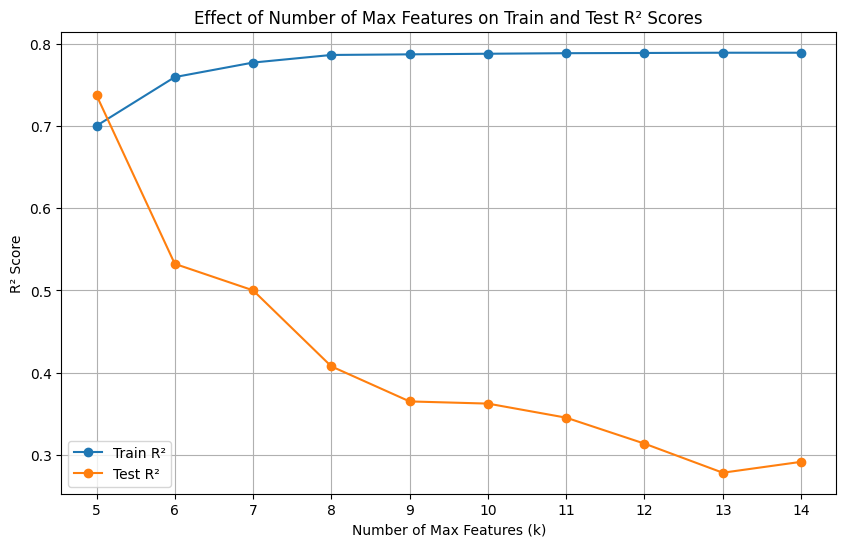


Regression Metrics (Training/Validation):
Train Mean Absolute Error (MAE): 0.016
Validation Mean Absolute Error (MAE): 0.023
Train Mean Squared Error (MSE): 0.001
Validation Mean Squared Error (MSE): 0.002
Train R² Score: 0.790
Validation R² Score: 0.291

Classification Metrics :
Accuracy Score: 0.996


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': range(50, 250, 5),
    'max_depth': range(4, 14),
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid = GridSearchCV(model, parameters, scoring='neg_mean_absolute_error', cv=5)

grid.fit(X_train, y_train)

grid.best_params_

model = grid.best_estimator_
model.fit(X_train, y_train)

y_test = model.predict(X_test)

k_values = np.arange(5, 15)

train_results = []
test_results = []

for k in k_values:
    model = xgb.XGBRegressor(n_estimators=100, max_depth=k, random_state=42)
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    train_results.append(train_score)

    test_score = model.score(X_test, y_test)
    test_results.append(test_score)

for k, train_result, test_result in zip(k_values, train_results, test_results):
    print(f'k = {k}: Train R² = {train_result:.3f}, Test R² = {test_result:.3f}')

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_results, label='Train R²', marker='o')
plt.plot(k_values, test_results, label='Test R²', marker='o')

plt.xlabel('Number of Max Features (k)')
plt.ylabel('R² Score')
plt.title('Effect of Number of Max Features on Train and Test R² Scores')
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Generate regression predictions for the training and validation data
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_test)

# Calculate regression metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_test, y_val_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_test, y_val_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_test, y_val_pred)

# Convert continuous predictions to binary predictions for classification metrics
y_train_pred_bin = (y_train_pred >= 0.5).astype(int)
y_val_pred_bin = (y_val_pred >= 0.5).astype(int)

# Ensure y_val is also binary for classification metrics
y_val_bin = (y_test >= 0.5).astype(int)

# Calculate classification metrics for validation data
accuracy_val = accuracy_score(y_val_bin, y_val_pred_bin)
precision_val = precision_score(y_val_bin, y_val_pred_bin)
recall_val = recall_score(y_val_bin, y_val_pred_bin)
f1_val = f1_score(y_val_bin, y_val_pred_bin)

classification_report_val = classification_report(y_val_bin, y_val_pred_bin, target_names=['Non-Click', 'Click'])

# Simulate binary click rate for test data
y_test_simulated = np.random.uniform(low=0, high=1, size=X_test.shape[0])
y_test_bin_simulated = (y_test_simulated >= 0.5).astype(int)

# Generate predictions for the test data
y_test_pred = model.predict(X_test)
y_test_pred_bin = (y_test_pred >= 0.5).astype(int)

# Calculate classification metrics for the simulated test data
accuracy_test = accuracy_score(y_test_bin_simulated, y_test_pred_bin)
precision_test = precision_score(y_test_bin_simulated, y_test_pred_bin)
recall_test = recall_score(y_test_bin_simulated, y_test_pred_bin)
f1_test = f1_score(y_test_bin_simulated, y_test_pred_bin)

classification_report_test = classification_report(y_test_bin_simulated, y_test_pred_bin, target_names=['Non-Click', 'Click'])

# Print the metrics
print("\nRegression Metrics (Training/Validation):")
print(f"Train Mean Absolute Error (MAE): {mae_train:.3f}")
print(f"Validation Mean Absolute Error (MAE): {mae_val:.3f}")
print(f"Train Mean Squared Error (MSE): {mse_train:.3f}")
print(f"Validation Mean Squared Error (MSE): {mse_val:.3f}")
print(f"Train R² Score: {r2_train:.3f}")
print(f"Validation R² Score: {r2_val:.3f}")

print("\nClassification Metrics :")
print(f"Accuracy Score: {accuracy_val:.3f}")
